In [11]:
%pip install pandas matplotlib mysqlclient sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# HOST = "gateway01.us-west-2.prod.aws.tidbcloud.com"
# PORT = 4000
# USR = "4JHciBfpftZR67E.root"
# PWD = "aidBsAjcm2YUaFac"
# DB = "data"
TABLE = "hk_immigration_sum_daily"
# database_url = f"mysql+mysqldb://{USR}:{PWD}@{HOST}:{PORT}/{DB}"
database_url = 'sqlite:///../data/data.sqlite'

# 创建数据库引擎
engine = create_engine(database_url)

In [13]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 准备数据
queryAll = f"SELECT * FROM {TABLE} WHERE 日期 >= '2020-05-01' AND 日期 <= '2020-12-31';"
dfAll = pd.read_sql_query(queryAll, engine)

query2020 = f"SELECT * FROM {TABLE} WHERE 日期 >= '2020-05-01' AND 日期 <= '2020-12-31';"
df2020 = pd.read_sql_query(query2020, engine)

query2021 = f"SELECT * FROM {TABLE} WHERE 日期 >= '2021-01-01' AND 日期 <= '2021-12-31';"
df2021 = pd.read_sql_query(query2021, engine)

query2022 = f"SELECT * FROM {TABLE} WHERE 日期 >= '2022-01-01' AND 日期 <= '2022-12-31';"
df2022 = pd.read_sql_query(query2022, engine)

query2023 = f"SELECT * FROM {TABLE} WHERE 日期 >= '2023-01-01' AND 日期 <= '2023-12-31';"
df2023 = pd.read_sql_query(query2023, engine)

# 创建归一化器实例
scaler = MinMaxScaler()


# 定义一个函数来归一化除了日期外的所有列
def normalize_df(df):
    date_column = df['日期']
    df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('日期', axis=1)), columns=df.columns[1:])
    df_scaled['日期'] = date_column
    return df_scaled


# 归一化数据
dfAll_normalized = normalize_df(dfAll)
df2020_normalized = normalize_df(df2020)
df2021_normalized = normalize_df(df2021)
df2022_normalized = normalize_df(df2022)
df2023_normalized = normalize_df(df2023)

In [14]:
from matplotlib import font_manager

# fname中选择一个你本机查询出来的字体 若没有中文字体则需要你本人手动安装
plt.rc("font", family='MicroSoft YaHei', weight="bold")
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

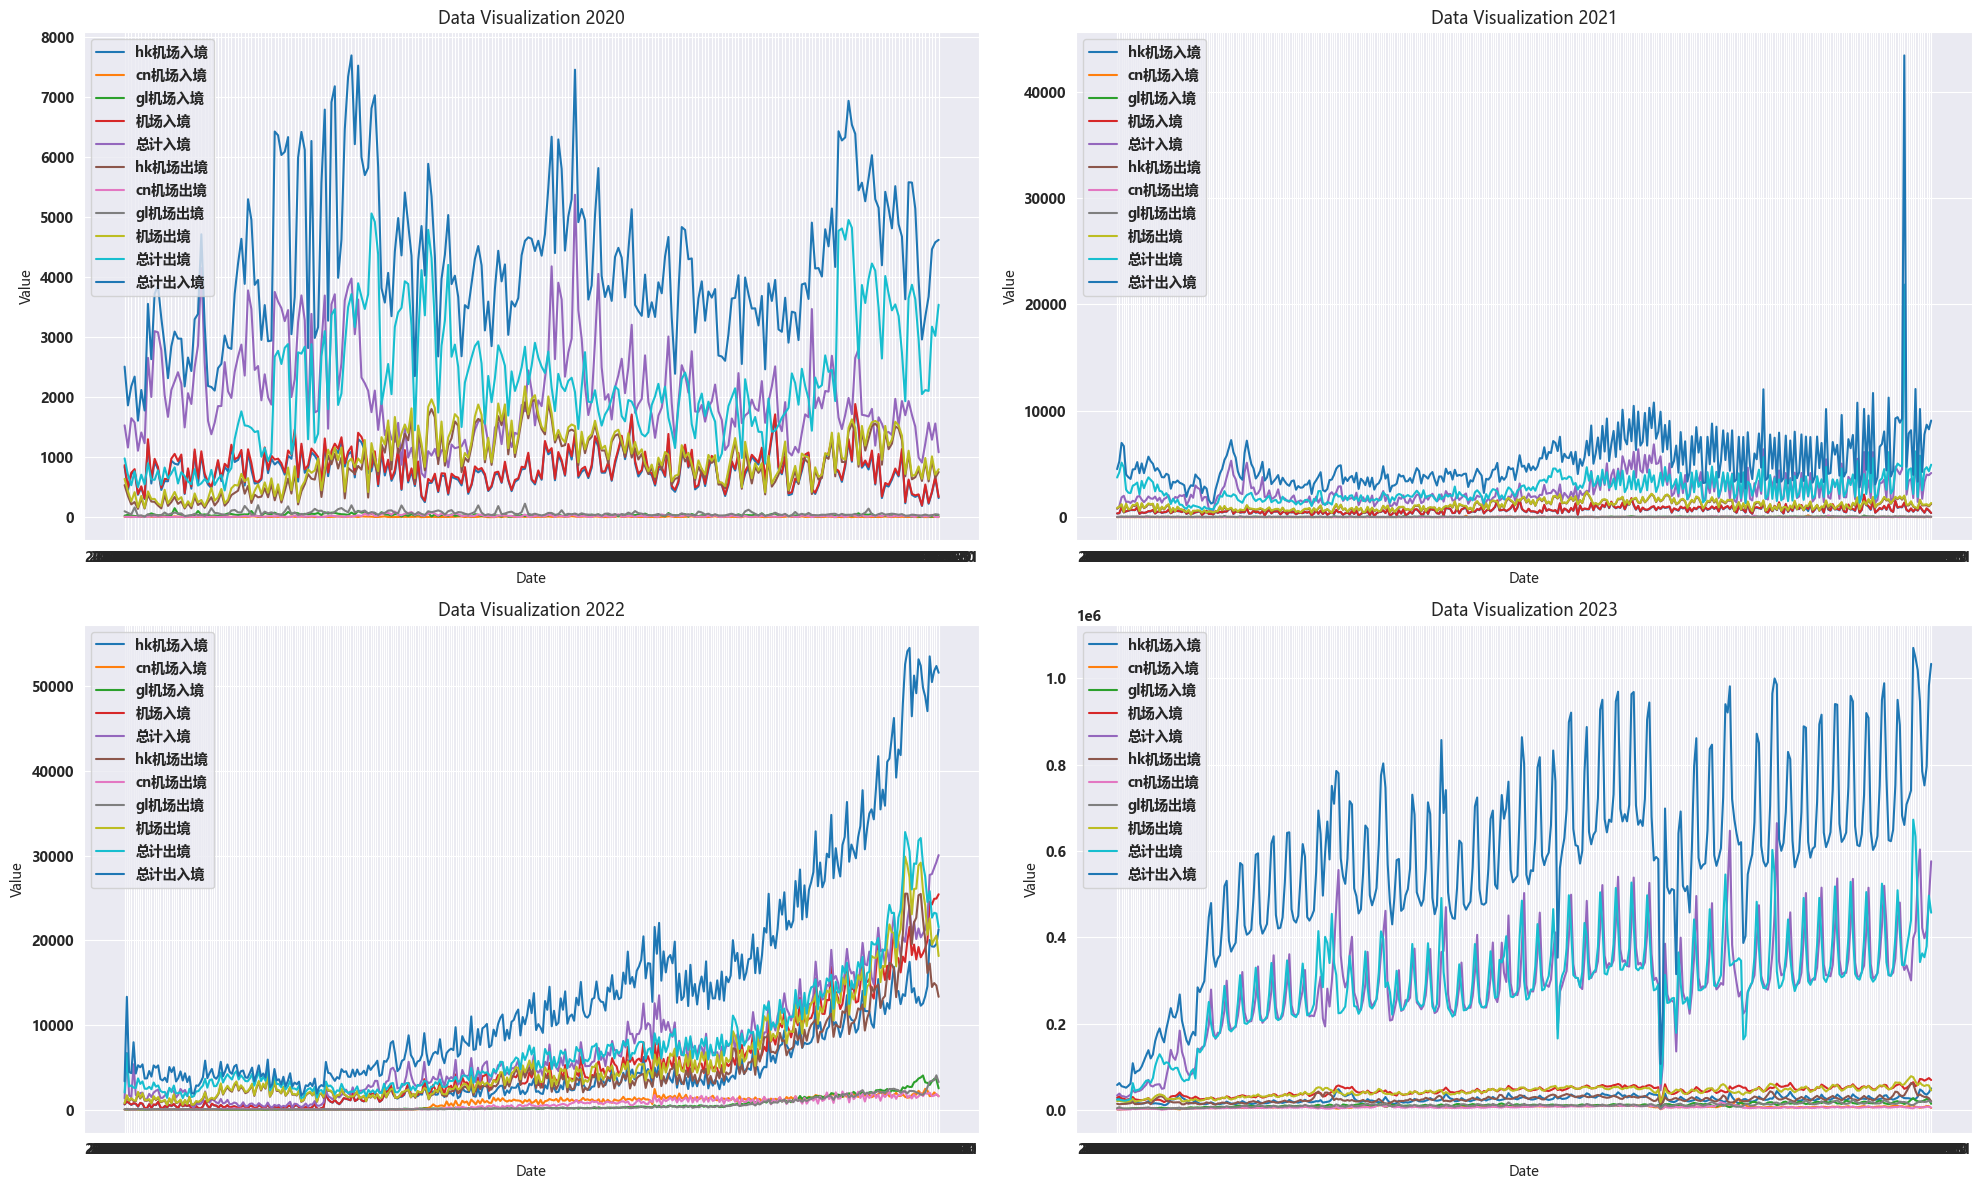

In [15]:
import matplotlib.pyplot as plt

# 设置图形大小并创建一个 2x2 的图表布局
fig, axs = plt.subplots(2, 2, figsize=(20, 12))


# 定义一个小函数来简化代码
def plot_data(ax, df, title):
    for column in df.columns:
        if column != '日期':
            ax.plot(df['日期'], df[column], label=column)
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(title)


# 分别绘制每年的数据
plot_data(axs[0, 0], df2020, 'Data Visualization 2020')
plot_data(axs[0, 1], df2021, 'Data Visualization 2021')
plot_data(axs[1, 0], df2022, 'Data Visualization 2022')
plot_data(axs[1, 1], df2023, 'Data Visualization 2023')

# 调整子图间距
plt.tight_layout()
plt.show()


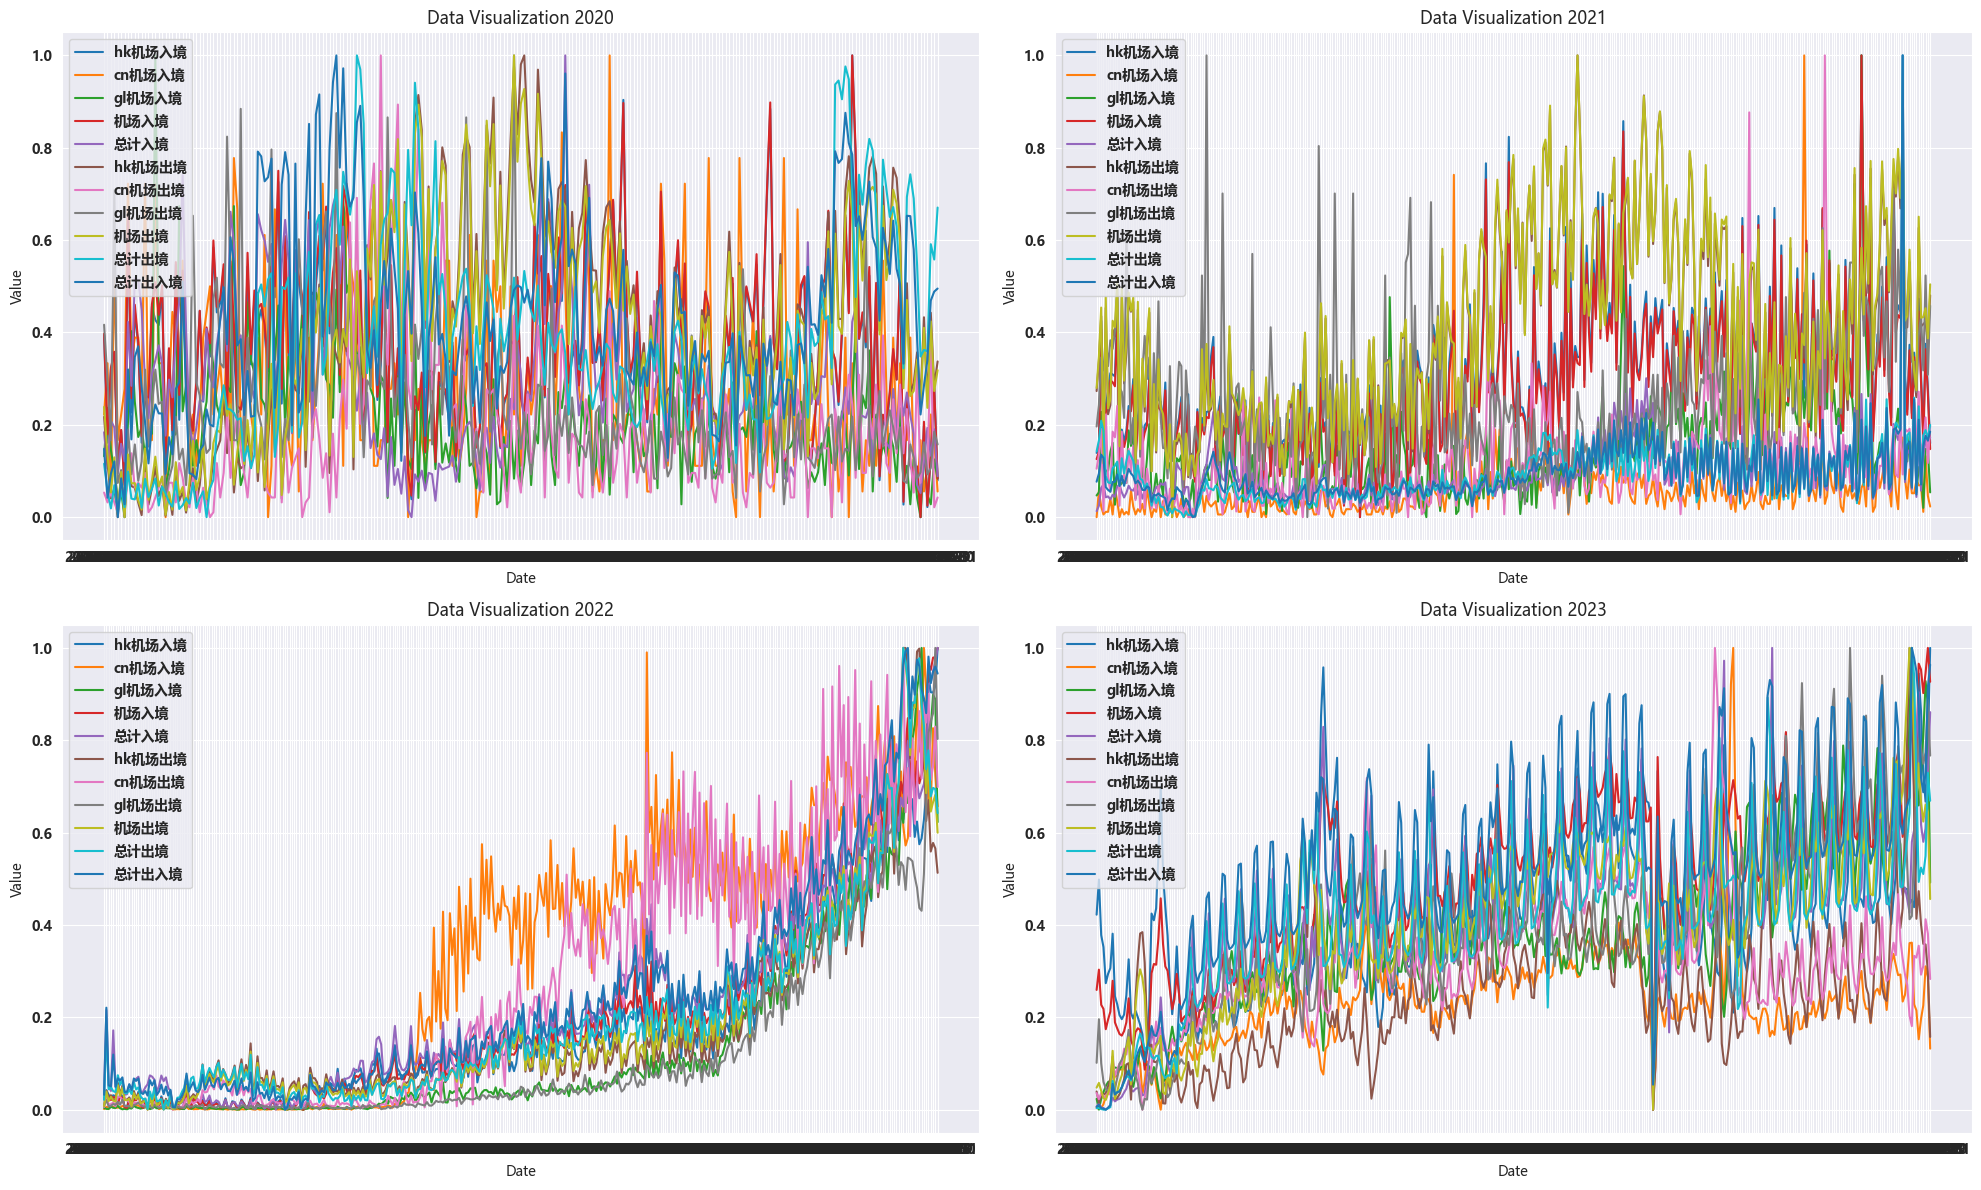

In [16]:
# 绘图代码，使用归一化后的数据
fig, axs = plt.subplots(2, 2, figsize=(20, 12))


# 定义一个小函数来简化代码
def plot_data(ax, df, title):
    for column in df.columns:
        if column != '日期':
            ax.plot(df['日期'], df[column], label=column)
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(title)


# 分别绘制每年的数据
plot_data(axs[0, 0], df2020_normalized, 'Data Visualization 2020')
plot_data(axs[0, 1], df2021_normalized, 'Data Visualization 2021')
plot_data(axs[1, 0], df2022_normalized, 'Data Visualization 2022')
plot_data(axs[1, 1], df2023_normalized, 'Data Visualization 2023')

# 调整子图间距
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
import seaborn as sns
import matplotlib.pyplot as plt


# 假设 df 是你的DataFrame，并且所有列都是数值型数据
def dtw_matrix_plt(df: pd.DataFrame):
    df = df.drop(columns=['日期'])
    # 创建一个空的DataFrame用于存储DTW距离
    series = df.values.astype(np.float64).swapaxes(1, 0)
    dtw_matrix = dtw.distance_matrix_fast(series)
    # 对角线填充为1,避免对0取对数
    np.fill_diagonal(dtw_matrix, 1)
    dtw_matrix_log = np.log10(dtw_matrix)
    # 加上column name
    dtw_matrix_frame = pd.DataFrame(data=dtw_matrix_log, columns=df.columns, index=df.columns)
    # 使用Seaborn绘制热图
    plt.rc("font", family='MicroSoft YaHei', weight="bold")
    plt.figure(figsize=(10, 8))
    sns.heatmap(dtw_matrix_frame, annot=True, cmap="viridis")
    plt.title("DTW Distance Matrix")
    plt.show()

# 3. HK政府数据内部关系

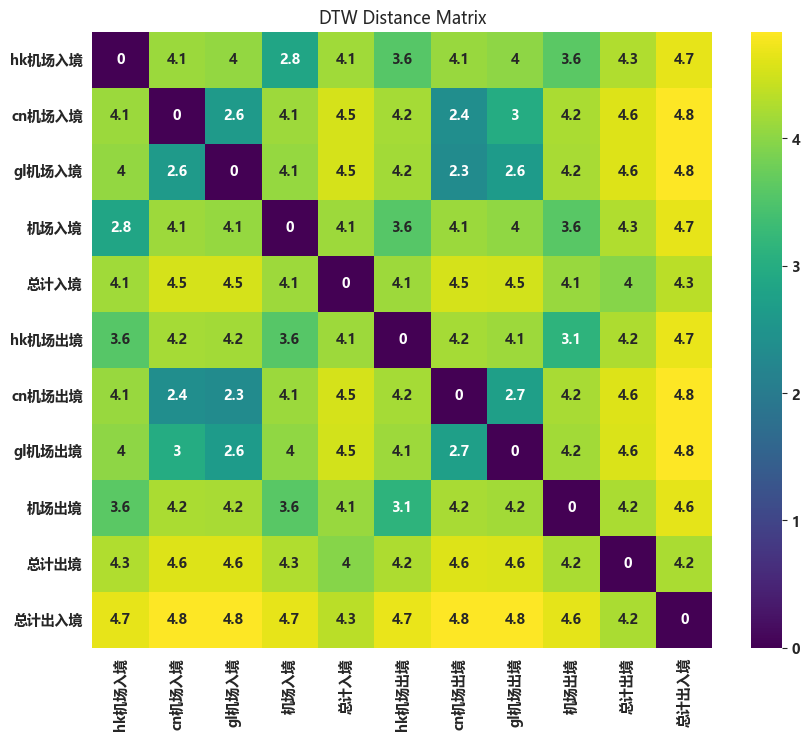

In [18]:
dtw_matrix_plt(dfAll)

从图中可以看出，我们把外国人香港机场入境（gl机场入境）设为baseline
可以发现和其关系最近的为cn机场出境入境，次深的为gl机场出境。
距离分别为200-300左右，其他的例如和gl机场出境的距离有1000

# 3. 月度数据关联程度

In [18]:
# 取出2020-1 ~ 2023-12 的hk月度数据
